<a href="https://colab.research.google.com/github/clovisdanielss/Colab-Projects/blob/main/mnist-fashion/Revisiting_MNIST_Fashion_Tensorflow_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Overview

This notebook It's a simple experiment using fashion mnist dataset. 
This dataset contains 60.000 images for training and 10.000 images for test in shape (28,28,1)
Also each image has a class in range [0, 9] meaning:

|Class|Meaning|
|-----|-------|
|0	| T-shirt/top|
|1	|Trouser
|2	|Pullover
|3	|Dress
|4	|Coat
|5	|Sandal
|6	|Shirt
|7	|Sneaker
|8	|Bag
|9	|Ankle boot

### Objective

Our objective It's to create a colthing classifier.

In [31]:
import tensorflow_datasets as tfdset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
%matplotlib inline
keras = tf.keras

In [2]:
labels = ['T-Shirt/Top', 'Trouser', 'PullOver', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
dataset, metadata = tfdset.load("fashion_mnist", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteR12HES/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteR12HES/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
train_data, test_data = dataset["train"], dataset["test"]
ele = list(train_data.take(1).as_numpy_iterator())[0]
ele[0].shape, ele[1].shape

((28, 28, 1), ())

In [5]:
ele = list(train_data.take(60000).as_numpy_iterator())
len(ele)

60000

In [6]:
len(ele[0]), ele[0][0].shape, ele[0][1]
x_train = tf.constant([arr[0] for arr in ele])
y_train = tf.constant([arr[1] for arr in ele])

In [7]:
x_train.shape, y_train.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([60000]))

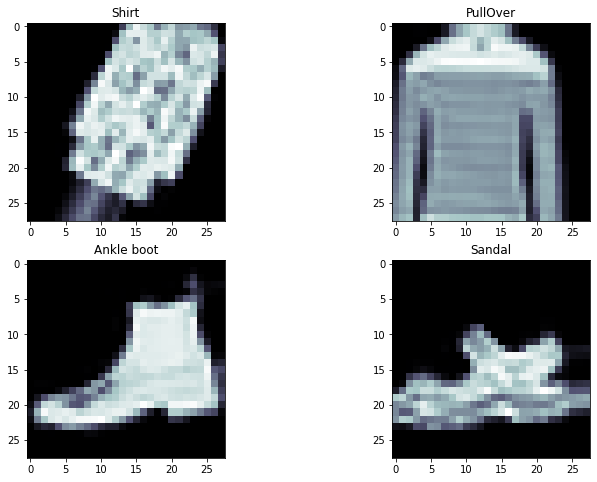

In [8]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

plt.figure(figsize=(12,8))
for index in [1,2,3,4]:
  plt.subplot(2,2,index)
  datagenerator = data_gen.flow((x_train,y_train))
  plt.imshow(tf.reshape(datagenerator[0][0][0], shape=(28,28)), cmap=plt.cm.bone)
  plt.title(labels[datagenerator[0][1][0]])

In [9]:
flatten_figure = list(test_data.take(1).as_numpy_iterator())[0][0].reshape(28*28)
max(flatten_figure), min(flatten_figure)

(255, 0)

How we can see, the images use the pixels values in range 0 until 255. So we will normalize those images to become of range 0 until 1.

In [10]:
def normalize(instance, label):
  instance = tf.cast(instance, tf.float32)
  instance /= 255
  return instance, label

test_data = test_data.map(normalize)

In [11]:
train_data = train_data.map(normalize)

In [12]:
flatten_figure = list(test_data.take(1).as_numpy_iterator())[0][0].reshape(28*28)
max(flatten_figure), min(flatten_figure)

(1.0, 0.0)

### Using a dense model

Now we can see that the images are normalized

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

batch_size = 32
n_train_exemples = 60000
train = train_data.cache().shuffle(n_train_exemples).batch(batch_size)
test = test_data.cache().batch(batch_size)

In [15]:
import math
model.fit(train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.5002 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3786 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3387 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3134 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.8899


In [16]:
n_test_examples = 10000
model.evaluate(test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3658 - accuracy: 0.8660


[0.36584699153900146, 0.8659999966621399]

In [17]:
model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model_1.fit_generator(datagenerator, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


1875/1875 [==============================] - 19s 10ms/step - loss: 0.8359 - accuracy: 0.6888
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6729 - accuracy: 0.7469
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6274 - accuracy: 0.7661
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6006 - accuracy: 0.7738
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5818 - accuracy: 0.7824


In [18]:
model_1.evaluate(test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5349 - accuracy: 0.7994


[0.5348993539810181, 0.7993999719619751]

In [19]:
image, label = list(test.take(1).as_numpy_iterator())[0]
single_image = image[0,:,:,:]
label = label[0]
single_image.shape

(28, 28, 1)

Text(0.5, 1.0, 'Label: Coat Predicted: Coat')

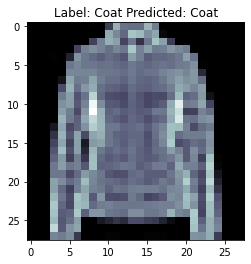

In [20]:
plt.imshow(single_image.reshape(28,28), cmap="bone")
pred = model.predict(single_image.reshape(1,28,28,1))
pred = np.argmax(pred, axis = -1)[0]
plt.title(f"Label: {labels[label]} Predicted: {labels[pred]}")

### Using a CNN Model

In [21]:
model_2 = keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),padding="same",activation="relu",input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(64,(3,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [22]:
model_2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

batch_size = 32
n_train_exemples = 60000
train = train_data.cache().repeat().shuffle(n_train_exemples).batch(batch_size)
test = test_data.cache().batch(batch_size)

model_2.fit(train, epochs=5, steps_per_epoch=math.ceil(n_train_exemples/batch_size))
model_2.evaluate(test, steps = math.ceil(n_test_examples/batch_size))

Epoch 1/5
1875/1875 [==============================] - 16s 3ms/step - loss: 0.3978 - accuracy: 0.8577
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2558 - accuracy: 0.9073
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2117 - accuracy: 0.9221
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1807 - accuracy: 0.9339
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2527 - accuracy: 0.9185


[0.25269249081611633, 0.9185000061988831]

In [23]:
model_3 = keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),padding="same",activation="relu",input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(64,(3,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_3.fit(datagenerator, epochs=5)
model_3.evaluate(test, steps = math.ceil(n_test_examples/batch_size))

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6378 - accuracy: 0.7589
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4625 - accuracy: 0.8245
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4060 - accuracy: 0.8485
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3710 - accuracy: 0.8601
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8731


[0.35192134976387024, 0.8730999827384949]

Text(0.5, 1.0, 'Label: Coat Predicted: Coat')

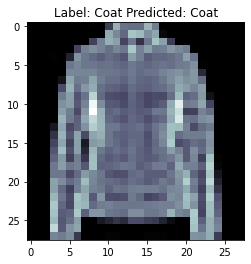

In [24]:
plt.imshow(single_image.reshape(28,28), cmap="bone")
pred = model_3.predict(single_image.reshape(1,28,28,1))
pred = np.argmax(pred, axis = -1)[0]
plt.title(f"Label: {labels[label]} Predicted: {labels[pred]}")

In [29]:
ele = list(test_data.take(10000).as_numpy_iterator())
y_test = tf.constant([arr[1] for arr in ele])
x_test = tf.constant([arr[0] for arr in ele])

x_test.shape, y_test.shape

(TensorShape([10000, 28, 28, 1]), TensorShape([10000]))

In [66]:
model_2.evaluate(x=x_test, y=y_test)
prediction_2 = model_2.predict(x_test)

model_3.evaluate(x=x_test, y=y_test)
prediction_3 = model_3.predict(x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3519 - accuracy: 0.8731


In [75]:
print(classification_report(y_test, np.argmax(prediction_2, axis=-1), target_names=labels))
print(classification_report(y_test, np.argmax(prediction_3, axis=-1), target_names=labels))

              precision    recall  f1-score   support

 T-Shirt/Top       0.84      0.91      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    PullOver       0.88      0.86      0.87      1000
       Dress       0.93      0.92      0.92      1000
        Coat       0.84      0.89      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.81      0.71      0.76      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

              precision    recall  f1-score   support

 T-Shirt/Top       0.85      0.80      0.82      1000
     Trouser       1.00      0.96      0.98      1000
    PullOver       0.81      0.86      0.83      1000
       Dress       0.87 

### Report

From out classification report it seems that the model_2 is better than model_3

But let's use the generator with the same parameters and see how the model_2 behave.

In [73]:
#We should remove the normalization because data_gen is setted to normalize again
testdatagenerator = data_gen.flow((x_test*255,y_test))

In [109]:
x_transformed_test = []
y_transformed_test = []
sample_test = int(1000/32)
while len(x_transformed_test) < sample_test:
  x,y = testdatagenerator.next()
  x_transformed_test.append(x)
  y_transformed_test.append(y)

x_transformed_test = np.concatenate(x_transformed_test)
y_transformed_test = np.concatenate(y_transformed_test)
x_transformed_test.shape, y_transformed_test.shape

((992, 28, 28, 1), (992,))

In [112]:
model_2.evaluate(x=x_transformed_test, y=y_transformed_test)
prediction_2 = model_2.predict(x_transformed_test)

model_3.evaluate(x=x_transformed_test, y=y_transformed_test)
prediction_3 = model_3.predict(x_transformed_test)

31/31 [==============================] - 0s 3ms/step - loss: 0.3458 - accuracy: 0.8770


In [113]:
print(classification_report(y_transformed_test, np.argmax(prediction_2, axis=-1), target_names=labels))
print(classification_report(y_transformed_test, np.argmax(prediction_3, axis=-1), target_names=labels))

              precision    recall  f1-score   support

 T-Shirt/Top       0.49      0.60      0.54        89
     Trouser       0.93      0.76      0.84       107
    PullOver       0.68      0.50      0.58        90
       Dress       0.48      0.50      0.49        94
        Coat       0.65      0.48      0.55       108
      Sandal       0.77      0.91      0.84       103
       Shirt       0.26      0.26      0.26        89
     Sneaker       0.87      0.72      0.79       113
         Bag       0.54      0.90      0.67       100
  Ankle boot       0.93      0.76      0.83        99

    accuracy                           0.65       992
   macro avg       0.66      0.64      0.64       992
weighted avg       0.67      0.65      0.65       992

              precision    recall  f1-score   support

 T-Shirt/Top       0.75      0.89      0.81        89
     Trouser       0.99      0.98      0.99       107
    PullOver       0.75      0.86      0.80        90
       Dress       0.88 

### Result

When applying data augumentation, we can see that our model_2 pefforms worse than our model_3. 

So, model_3 generalizes better than model_2.

In [124]:
model_3 = keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),padding="same",activation="relu",input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(64,(3,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_3.fit(datagenerator, epochs=25)
model_3.evaluate(test, steps = math.ceil(n_test_examples/batch_size))

Epoch 1/25
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6205 - accuracy: 0.7662
Epoch 2/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4486 - accuracy: 0.8306
Epoch 3/25
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3962 - accuracy: 0.8520
Epoch 4/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3661 - accuracy: 0.8626
Epoch 5/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3455 - accuracy: 0.8711
Epoch 6/25
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3321 - accuracy: 0.8765
Epoch 7/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3164 - accuracy: 0.8821
Epoch 8/25
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3068 - accuracy: 0.8868
Epoch 9/25
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2987 - accuracy: 0.8890
Epoch 10/25
1875/1875 [==============================] - 20s 10m

[0.2485276162624359, 0.911899983882904]

In [125]:
from google.colab import files
model_3.save("mnist-fashion-model.h5")
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras mnist-fashion-model.h5 ./mnist-model-cnn/
files.download("mnist-model-cnn/group1-shard1of1.bin")
files.download("mnist-model-cnn/model.json")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Using real data example

In [117]:
import cv2
img = cv2.imread("/content/drive/MyDrive/ColabDataFolder/vestido.jpg")

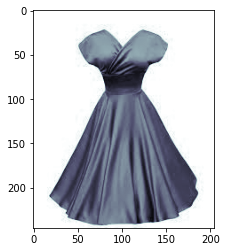

In [118]:
plt.imshow(img.mean(-1), cmap="bone")

In [119]:
img = tf.convert_to_tensor(img.mean(-1), dtype=tf.float32)
img

<tf.Tensor: shape=(246, 205), dtype=float32, numpy=
array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)>

In [120]:
img = tf.image.resize(tf.reshape(img,[img.shape[0], img.shape[1], 1]), (28,28))

### Note

It was observed that in the dataset the empty was represent by 0, and the colthing was represented by values greater than 0. 

But in the web image, 255 represented the white background. So we needed to normalize and subtract from 1 to make 0 represent the background instead of one. 

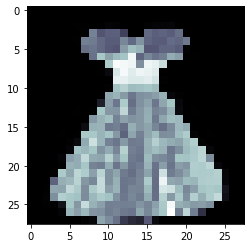

In [121]:
plt.imshow(1 - tf.reshape(img,[img.shape[0], img.shape[1]]), cmap="bone")

In [122]:
pred = model_3.predict(1-tf.reshape(img/255, [1,img.shape[0], img.shape[1],1]))
pred_ = np.argmax(pred, axis = -1)[0]
pred_, pred

(3, array([[2.5756558e-04, 1.5969703e-06, 1.2406410e-07, 9.9828893e-01,
         3.5700418e-06, 7.2289363e-04, 1.7777747e-04, 4.8079901e-06,
         2.6116919e-04, 2.8153643e-04]], dtype=float32))

In [123]:
labels[pred_]

'Dress'